<a href="https://colab.research.google.com/github/ernesc/masters_thesis_2022/blob/main/bidir_LSTM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis Valve

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Activation
import tensorflow as tf
plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

In [ ]:
def extract_data(filename, dataframe):
    
    import pandas as pd
    
    df_filename = pd.read_csv(filename,";")

    df_filename_lukket2 = pd.DataFrame()
    df_filename_lukket2 = df_filename_lukket2.append(df_filename[df_filename["Data Source"].str.contains("LUKKET")])
    df_filename_lukket = pd.DataFrame()
    df_filename_lukket = df_filename_lukket.append(df_filename_lukket2[df_filename_lukket2["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_lukket = df_filename_lukket.rename(columns={"Data Source": "data_source_lukket", 
                                          "Time": "time_lukket", 
                                          "Value": "value_lukket"})
    df_filename_lukket["time_lukket"] = pd.to_datetime(df_filename_lukket["time_lukket"])
    
    
    df_filename_apen1 = pd.DataFrame()
    df_filename_apen1 = df_filename_apen1.append(df_filename[df_filename["Data Source"].str.contains("APEN")])
    df_filename_apen = pd.DataFrame()
    df_filename_apen = df_filename_apen.append(df_filename_apen1[df_filename_apen1["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_apen = df_filename_apen.rename(columns={"Data Source": "data_source_apen", 
                                      "Time": "time_apen", 
                                      "Value": "value_apen"})
    df_filename_apen["time_apen"] = pd.to_datetime(df_filename_apen["time_apen"])
    
    df_filename_lukket.reset_index(inplace = True)
    df_filename_apen.reset_index(inplace=True)
    df_filename_lukket = df_filename_lukket.drop(columns="index")
    df_filename_apen = df_filename_apen.drop(columns="index")
    
    df_filename_apen['interval'] = pd.to_datetime(df_filename_apen['time_apen'])
    df_filename_lukket['interval'] = pd.to_datetime(df_filename_lukket['time_lukket'])
    
    df_filename_apen.sort_values(by=['interval'])
    df_filename_lukket.sort_values(by=['interval'])
    
    dataframe = pd.merge_asof(df_filename_apen, df_filename_lukket, on='interval', direction="nearest")
    
    
    dataframe["time_diff"] = dataframe["time_apen"] - dataframe["time_lukket"]
    
    dataframe["time_diff_sec"] = dataframe["time_diff"].dt.total_seconds()
    
    dataframe = dataframe.drop(dataframe[dataframe["time_diff_sec"] == 0].index)
    
    return dataframe

In [ ]:

data_2012_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2012.csv", 2012)
data_2013_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2013.csv", 2013)
data_2014_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2014.csv", 2014)
data_2015_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2015.csv", 2015)
data_2016_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2016.csv", 2016)
data_2017_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2017.csv", 2017)
data_2018_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2018.csv", 2018)
data_2019_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2019.csv", 2019)
data_2020_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2020.csv", 2020)
data_2021_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2021.csv", 2021)


frames = [data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1]

agg1 = pd.concat(frames)

data_2012_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2012.csv", 2012)
data_2013_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2013.csv", 2013)
data_2014_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2014.csv", 2014)
data_2015_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2015.csv", 2015)
data_2016_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2016.csv", 2016)
data_2017_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2017.csv", 2017)
data_2018_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2018.csv", 2018)
data_2019_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2019.csv", 2019)
data_2020_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2020.csv", 2020)
data_2021_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2021.csv", 2021)


frames = [data_2012_2, data_2013_2, data_2014_2, data_2015_2, data_2016_2, data_2017_2, data_2018_2, data_2019_2, data_2020_2, data_2021_2]

agg2 = pd.concat(frames)

data_2012_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2012.csv", 2012)
data_2013_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2013.csv", 2013)
data_2014_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2014.csv", 2014)
data_2015_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2015.csv", 2015)
data_2016_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2016.csv", 2016)
data_2017_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2017.csv", 2017)
data_2018_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2018.csv", 2018)
data_2019_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2019.csv", 2019)
data_2020_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2020.csv", 2020)
data_2021_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2021.csv", 2021)


frames = [data_2012_3, data_2013_3, data_2014_3, data_2015_3, data_2016_3, data_2017_3, data_2018_3, data_2019_3, data_2020_3, data_2021_3]

agg3 = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: F

In [ ]:
agg1_close = agg1[agg1.time_diff_sec < 0]
agg1_open = agg1[agg1.time_diff_sec > 0]
agg1_open_v1 = agg1_open['time_diff_sec']
agg1_close_v1 = agg1_close['time_diff_sec']


agg2_close = agg2[agg2.time_diff_sec < 0]
agg2_open = agg2[agg2.time_diff_sec > 0]
agg2_open_v1 = agg2_open['time_diff_sec']
agg2_close_v1 = agg2_close['time_diff_sec']

agg3_close = agg3[agg3.time_diff_sec < 0]
agg3_open = agg3[agg3.time_diff_sec > 0]
agg3_open_v1 = agg3_open['time_diff_sec']
agg3_close_v1 = agg3_close['time_diff_sec']

In [ ]:
def remove_outliers_v1(data, cutoff):
    data_mean, data_std = np.mean(data), np.std(data)
    cut_off = data_std * cutoff
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier obs: %d' % len(outliers_removed))
    
    return outliers

In [33]:
dataset = agg1_close_v1
# validation data is going to be the last 60 cycles
last = 100

In [40]:
outliers = remove_outliers_v1(dataset, 3)

Identified outliers: 2
Non-outlier obs: 348


In [41]:
dataset = dataset[~dataset.isin(outliers)]

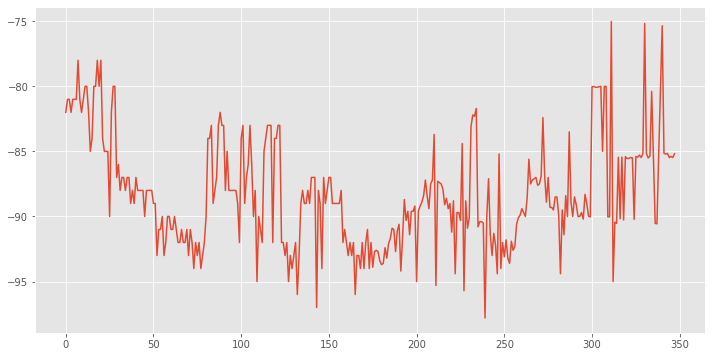

In [42]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0,len(dataset)),dataset)

In [43]:
def sliding_window(data, window_size): 
  from numpy import array
  X, y = list(), list()
  for i in range(len(data)):
    # find the end of this pattern
    end_ix = i + window_size
    # check if we are beyond the sequence
    if end_ix > len(data)-1: 
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = data[i:end_ix], data[end_ix] 
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [50]:
n_steps = 50
# split into samples
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

X, y = sliding_window(list(dataset)[:len(dataset)-last], n_steps)
X_val, y_val = sliding_window(list(agg3_close_v1)[len(dataset)-last:], n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]


In [51]:
cp = ModelCheckpoint('modellstmbir1o5/', save_best_only=True, monitor='val_root_mean_squared_error')
early_stopping = EarlyStopping(monitor='val_root_mean_squared_error', patience=100)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(n_steps, n_features))) 
model.add(Dense(1))
opt = Adam(learning_rate=.001)
model.compile(optimizer=opt, loss='mae', metrics=[RootMeanSquaredError()])
# fit model


history = model.fit(X, y, epochs=1000, validation_data=(X_val, y_val), batch_size=2,
                    verbose=1, callbacks=[cp, early_stopping])


Epoch 1/1000
99/99 [==============================] - ETA: 0s - loss: 621.0658 - root_mean_squared_error: 766.7048INFO:tensorflow:Assets written to: modellstmbir1o5/assets


INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 12s 104ms/step - loss: 621.0658 - root_mean_squared_error: 766.7048 - val_loss: 224.6272 - val_root_mean_squared_error: 513.9668
Epoch 2/1000
99/99 [==============================] - 4s 37ms/step - loss: 41.5986 - root_mean_squared_error: 67.7639 - val_loss: 259.6035 - val_root_mean_squared_error: 1117.8662
Epoch 3/1000
99/99 [==============================] - 4s 36ms/step - loss: 193.3596 - root_mean_squared_error: 362.5807 - val_loss: 235.8927 - val_root_mean_squared_error: 1065.9976
Epoch 4/1000
99/99 [==============================] - 4s 37ms/step - loss: 37.7723 - root_mean_squared_error: 54.4377 - val_loss: 293.9649 - val_root_mean_squared_error: 892.3965
Epoch 5/1000
99/99 [==============================] - 4s 38ms/step - loss: 21.5020 - root_mean_squared_error: 33.4957 - val_loss: 367.3246 - val_root_mean_squared_error: 1484.3867
Epoch 6/1000
99/99 [==============================] - ETA: 0s - loss: 10.8760 - root_mean_squared_error: 14.9

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 10s 97ms/step - loss: 10.8760 - root_mean_squared_error: 14.9321 - val_loss: 239.1524 - val_root_mean_squared_error: 433.2508
Epoch 7/1000
99/99 [==============================] - 4s 36ms/step - loss: 57.2757 - root_mean_squared_error: 88.7872 - val_loss: 358.4550 - val_root_mean_squared_error: 861.0228
Epoch 8/1000
99/99 [==============================] - 4s 37ms/step - loss: 41.4621 - root_mean_squared_error: 59.5558 - val_loss: 361.2983 - val_root_mean_squared_error: 968.4263
Epoch 9/1000
99/99 [==============================] - 4s 37ms/step - loss: 11.3617 - root_mean_squared_error: 16.6385 - val_loss: 328.8600 - val_root_mean_squared_error: 735.5045
Epoch 10/1000
99/99 [==============================] - 4s 37ms/step - loss: 32.7731 - root_mean_squared_error: 57.2135 - val_loss: 471.1067 - val_root_mean_squared_error: 1532.8944
Epoch 11/1000
99/99 [==============================] - 4s 37ms/step - loss: 5.9111 - root_mean_squared_error: 7.664

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 9s 93ms/step - loss: 2.8706 - root_mean_squared_error: 3.6838 - val_loss: 193.9269 - val_root_mean_squared_error: 424.1533
Epoch 25/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.6800 - root_mean_squared_error: 3.5232 - val_loss: 228.9443 - val_root_mean_squared_error: 716.4603
Epoch 26/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.8805 - root_mean_squared_error: 3.6884 - val_loss: 299.7205 - val_root_mean_squared_error: 1096.4978
Epoch 27/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.6563 - root_mean_squared_error: 3.4424 - val_loss: 252.1861 - val_root_mean_squared_error: 727.6738
Epoch 28/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.6149 - root_mean_squared_error: 3.5091 - val_loss: 264.8906 - val_root_mean_squared_error: 913.2709
Epoch 29/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.3905 - root_mean_squared_error: 3.1777 - val_

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 10s 100ms/step - loss: 2.4678 - root_mean_squared_error: 3.2060 - val_loss: 140.5681 - val_root_mean_squared_error: 373.2579
Epoch 43/1000
99/99 [==============================] - ETA: 0s - loss: 2.4156 - root_mean_squared_error: 3.1132INFO:tensorflow:Assets written to: modellstmbir1o5/assets


INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 9s 93ms/step - loss: 2.4156 - root_mean_squared_error: 3.1132 - val_loss: 140.9696 - val_root_mean_squared_error: 356.3977
Epoch 44/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.4995 - root_mean_squared_error: 3.2706 - val_loss: 146.6701 - val_root_mean_squared_error: 402.8519
Epoch 45/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.5650 - root_mean_squared_error: 3.3280 - val_loss: 224.6839 - val_root_mean_squared_error: 647.9551
Epoch 46/1000
99/99 [==============================] - ETA: 0s - loss: 2.3869 - root_mean_squared_error: 3.1667INFO:tensorflow:Assets written to: modellstmbir1o5/assets


INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 10s 98ms/step - loss: 2.3869 - root_mean_squared_error: 3.1667 - val_loss: 147.2926 - val_root_mean_squared_error: 322.5722
Epoch 47/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.4914 - root_mean_squared_error: 3.3306 - val_loss: 141.8356 - val_root_mean_squared_error: 347.3753
Epoch 48/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.4449 - root_mean_squared_error: 3.1804 - val_loss: 181.4512 - val_root_mean_squared_error: 480.2196
Epoch 49/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.6687 - root_mean_squared_error: 3.3696 - val_loss: 193.3024 - val_root_mean_squared_error: 551.0369
Epoch 50/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.6000 - root_mean_squared_error: 3.3877 - val_loss: 193.9667 - val_root_mean_squared_error: 465.6901
Epoch 51/1000
99/99 [==============================] - 4s 38ms/step - loss: 2.4351 - root_mean_squared_error: 3.1989 - val_

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 9s 94ms/step - loss: 2.5427 - root_mean_squared_error: 3.4531 - val_loss: 129.5303 - val_root_mean_squared_error: 254.2548
Epoch 53/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.6693 - root_mean_squared_error: 3.4910 - val_loss: 148.8035 - val_root_mean_squared_error: 314.3069
Epoch 54/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.8518 - root_mean_squared_error: 4.0934 - val_loss: 209.1449 - val_root_mean_squared_error: 802.0087
Epoch 55/1000
99/99 [==============================] - 4s 37ms/step - loss: 3.1070 - root_mean_squared_error: 4.0876 - val_loss: 181.6922 - val_root_mean_squared_error: 389.3417
Epoch 56/1000
99/99 [==============================] - 4s 37ms/step - loss: 3.3453 - root_mean_squared_error: 4.3590 - val_loss: 202.6959 - val_root_mean_squared_error: 412.5009
Epoch 57/1000
99/99 [==============================] - 4s 37ms/step - loss: 3.1893 - root_mean_squared_error: 4.1600 - val_l

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 10s 99ms/step - loss: 2.5768 - root_mean_squared_error: 3.3189 - val_loss: 125.8535 - val_root_mean_squared_error: 247.9853
Epoch 78/1000
99/99 [==============================] - ETA: 0s - loss: 2.5689 - root_mean_squared_error: 3.3327INFO:tensorflow:Assets written to: modellstmbir1o5/assets


INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 10s 99ms/step - loss: 2.5689 - root_mean_squared_error: 3.3327 - val_loss: 121.8595 - val_root_mean_squared_error: 230.0512
Epoch 79/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.6096 - root_mean_squared_error: 3.3789 - val_loss: 219.5429 - val_root_mean_squared_error: 791.7822
Epoch 80/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.3309 - root_mean_squared_error: 3.1339 - val_loss: 140.5511 - val_root_mean_squared_error: 329.0606
Epoch 81/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.9332 - root_mean_squared_error: 3.8212 - val_loss: 118.6197 - val_root_mean_squared_error: 265.0768
Epoch 82/1000
99/99 [==============================] - 4s 38ms/step - loss: 2.5922 - root_mean_squared_error: 3.3666 - val_loss: 140.1233 - val_root_mean_squared_error: 285.4196
Epoch 83/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.4882 - root_mean_squared_error: 3.2051 - val_

INFO:tensorflow:Assets written to: modellstmbir1o5/assets


99/99 [==============================] - 9s 94ms/step - loss: 2.7098 - root_mean_squared_error: 3.4913 - val_loss: 89.4473 - val_root_mean_squared_error: 192.8019
Epoch 87/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.5243 - root_mean_squared_error: 3.3061 - val_loss: 179.1150 - val_root_mean_squared_error: 475.9344
Epoch 88/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.2420 - root_mean_squared_error: 3.0400 - val_loss: 186.0320 - val_root_mean_squared_error: 581.4726
Epoch 89/1000
99/99 [==============================] - 4s 36ms/step - loss: 2.5689 - root_mean_squared_error: 3.3820 - val_loss: 184.5389 - val_root_mean_squared_error: 501.4995
Epoch 90/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.7157 - root_mean_squared_error: 3.4918 - val_loss: 133.5035 - val_root_mean_squared_error: 326.0740
Epoch 91/1000
99/99 [==============================] - 4s 37ms/step - loss: 2.4064 - root_mean_squared_error: 3.1170 - val_lo

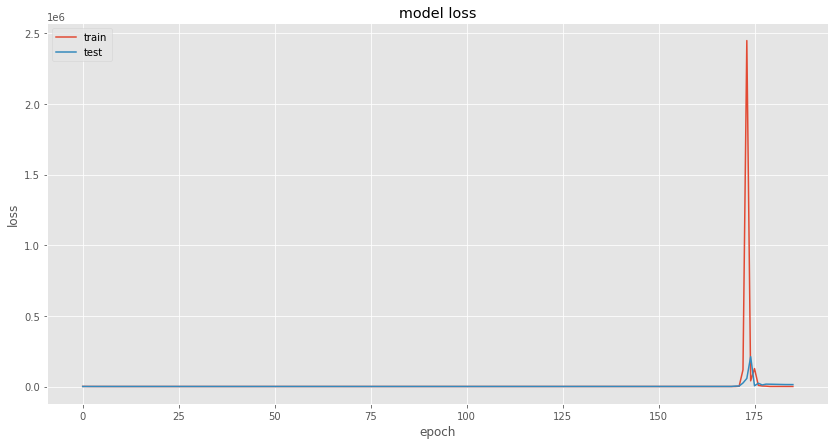

In [54]:
plt.figure(figsize = (14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# demonstrate prediction for next cycles
from tensorflow.keras.models import load_model
model100 = load_model('modellstmbir1o5/')

x_input = np.array(list(dataset)[-n_steps-1:])
temp_input=list(x_input)
lst_output=[]
i=0
cycles = last
while(i<cycles):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model100.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

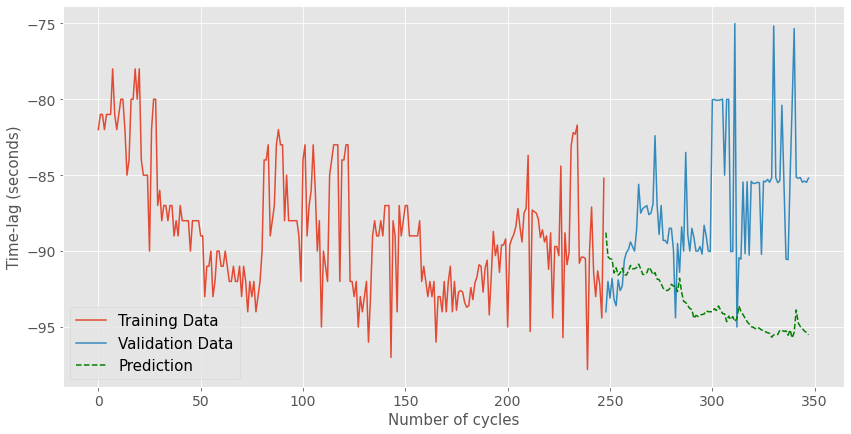

In [56]:
new_cycle=np.arange(0,len(dataset)-last)
cycle_pred=np.arange(len(dataset)-last,len(dataset)-last+cycles)
plt.figure(figsize=(14,7))
plt.plot(new_cycle,list(dataset)[:len(dataset)-last],
         label='Training Data')
plt.plot(np.arange(len(dataset)-last,len(dataset)), 
         list(dataset)[len(dataset)-last:], label='Validation Data', ls='-')
plt.plot(cycle_pred,lst_output, c='green', label='Prediction', ls='--')

plt.xlabel('Number of cycles', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Time-lag (seconds)', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/gdrive/My Drive/MASTER_data/BidirLSTM_agg1_close_v2.png')

In [57]:
from tensorflow.keras.metrics import mean_squared_error
print(f'RMSE {np.sqrt(mean_squared_error(list(dataset)[len(dataset)-last:], lst_output))}')

RMSE 8.110857963562012
